In [1]:
%pip install -U mlflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.7/24.7 MB 54.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 59.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 733.8/733.8 kB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.5/95.5 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.6 MB/s eta 0:00:00
  Attempting uninstall: importlib_metadata
    Found existing installation: importlib_metadata 8.7.0
    Uninstalling importlib_metadata-8.7.0:
      Successfully uninstalled importlib_metadata-8.7.0
ERROR: pip's dependency resolver does not currently take into account all the packages tha

In [2]:
# Install required logging tools
%pip install -q dagshub 

# Initialize DagsHub MLflow integration
import dagshub
dagshub.init(repo_owner='AleksandreBakhtadze', repo_name='ML-FinalProject-Walmart-Recruiting---Store-Sales-Forecasting', mlflow=True)

# Optional autologging (commented since you're manually logging below)
# import mlflow
# mlflow.autolog()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.0/261.0 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.3/74.3 kB 2.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.16.1 requires dacite>=1.8, but you have dacite 1.6.0 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


❗❗❗ AUTHORIZATION REQUIRED ❗❗❗



Open the following link in your browser to authorize the client:
https://dagshub.com/login/oauth/authorize?state=3ac3a9ef-cdaf-40c7-bd1b-2e69fe087df4&client_id=32b60ba385aa7cecf24046d8195a71c07dd345d9657977863b52e7748e0f0f28&middleman_request_id=614108edc7f00b36eff1cd2ea4e4750d7a4e88880183a431dddba95367c9929b




Output()

Accessing as AleksandreBakhtadze

Initialized MLflow to track repo "AleksandreBakhtadze/ML-FinalProject-Walmart-Recruiting---Store-Sales-Forecasting"

Repository AleksandreBakhtadze/ML-FinalProject-Walmart-Recruiting---Store-Sales-Forecasting initialized!

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


/kaggle/input/walmart-recruiting-store-sales-forecasting/train.csv.zip
/kaggle/input/walmart-recruiting-store-sales-forecasting/sampleSubmission.csv.zip
/kaggle/input/walmart-recruiting-store-sales-forecasting/stores.csv
/kaggle/input/walmart-recruiting-store-sales-forecasting/features.csv.zip
/kaggle/input/walmart-recruiting-store-sales-forecasting/test.csv.zip


In [4]:
import zipfile
# Helper function to read zipped CSVs
def read_zipped_csv(path):
    with zipfile.ZipFile(path) as z:
        file_name = z.namelist()[0]
        return pd.read_csv(z.open(file_name))
# Load data
train_df = read_zipped_csv('/kaggle/input/walmart-recruiting-store-sales-forecasting/train.csv.zip')
test_df = read_zipped_csv('/kaggle/input/walmart-recruiting-store-sales-forecasting/test.csv.zip')
features_df = read_zipped_csv('/kaggle/input/walmart-recruiting-store-sales-forecasting/features.csv.zip')
sample_submission_df = read_zipped_csv('/kaggle/input/walmart-recruiting-store-sales-forecasting/sampleSubmission.csv.zip')
stores_df = pd.read_csv('/kaggle/input/walmart-recruiting-store-sales-forecasting/stores.csv')


In [5]:
# Display columns and first few rows
print("🧾 Train.csv")
print(train_df.columns.tolist())
print(train_df.shape)
display(train_df.head())

print("\n🧾 Features.csv")
print(features_df.columns.tolist())
print(features_df.shape)
display(features_df.head())

print("\n🧾 Stores.csv")
print(stores_df.columns.tolist())
print(stores_df.shape)
display(stores_df.head())


🧾 Train.csv
['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday']
(421570, 5)


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False



🧾 Features.csv
['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday']
(8190, 12)


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False



🧾 Stores.csv
['Store', 'Type', 'Size']
(45, 3)


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [6]:
def display_unique_values(df, name="DataFrame"):
    print(f"\n🔍 Unique values in {name}:\n" + "-"*40)
    for col in df.columns:
        unique_vals = df[col].unique()
        num_unique = len(unique_vals)
        if num_unique <= 20:
            print(f"{col} ({num_unique}): {unique_vals}")
        else:
            print(f"{col} ({num_unique}): Too many to display, showing first 10 -> {unique_vals[:10]}")

# Apply to each dataset
display_unique_values(train_df, "train_df")
display_unique_values(features_df, "features_df")
display_unique_values(stores_df, "stores_df")



🔍 Unique values in train_df:
----------------------------------------
Store (45): Too many to display, showing first 10 -> [ 1  2  3  4  5  6  7  8  9 10]
Dept (81): Too many to display, showing first 10 -> [ 1  2  3  4  5  6  7  8  9 10]
Date (143): Too many to display, showing first 10 -> ['2010-02-05' '2010-02-12' '2010-02-19' '2010-02-26' '2010-03-05'
 '2010-03-12' '2010-03-19' '2010-03-26' '2010-04-02' '2010-04-09']
Weekly_Sales (359464): Too many to display, showing first 10 -> [24924.5  46039.49 41595.55 19403.54 21827.9  21043.39 22136.64 26229.21
 57258.43 42960.91]
IsHoliday (2): [False  True]

🔍 Unique values in features_df:
----------------------------------------
Store (45): Too many to display, showing first 10 -> [ 1  2  3  4  5  6  7  8  9 10]
Date (182): Too many to display, showing first 10 -> ['2010-02-05' '2010-02-12' '2010-02-19' '2010-02-26' '2010-03-05'
 '2010-03-12' '2010-03-19' '2010-03-26' '2010-04-02' '2010-04-09']
Temperature (4178): Too many to display, sh

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


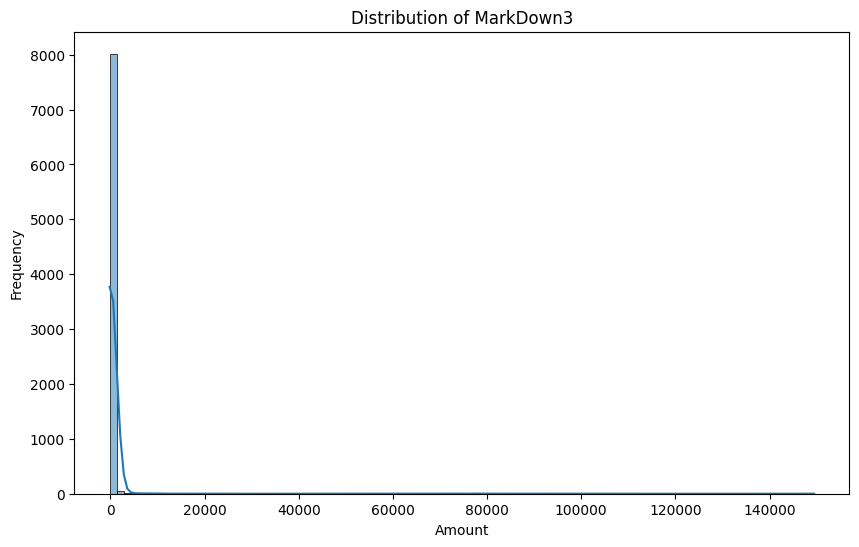

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Fill NaNs first
for i in range(1, 6):
    features_df[f'MarkDown{i}'] = features_df[f'MarkDown{i}'].fillna(0)

# Histogram example
plt.figure(figsize=(10, 6))
sns.histplot(features_df['MarkDown3'], bins=100, kde=True)
plt.title("Distribution of MarkDown3")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

In [8]:
def show_null_percentages(df, name="DataFrame"):
    print(f"\n📋 Missing Values (%): {name}")
    null_percent = df.isnull().mean() * 100
    null_percent = null_percent[null_percent > 0].sort_values(ascending=False)
    
    if null_percent.empty:
        print("✅ No missing values.")
    else:
        for col, pct in null_percent.items():
            print(f"{col}: {pct:.2f}%")

# Apply to each dataset
show_null_percentages(train_df, "train_df")
show_null_percentages(features_df, "features_df")
show_null_percentages(stores_df, "stores_df") 



📋 Missing Values (%): train_df
✅ No missing values.

📋 Missing Values (%): features_df
CPI: 7.14%
Unemployment: 7.14%

📋 Missing Values (%): stores_df
✅ No missing values.


In [9]:
# Merge train with features and stores
train_full = train_df.merge(features_df, on=["Store", "Date"], how="left")
train_full = train_full.merge(stores_df, on="Store", how="left")
train_full = train_full.drop(columns=['IsHoliday_y'])
train_full = train_full.rename(columns={'IsHoliday_x': 'IsHoliday'}) 


In [10]:
# Convert date to datetime
train_full['Date'] = pd.to_datetime(train_full['Date'])

# Extract useful features
train_full['Year'] = train_full['Date'].dt.year
train_full['Month'] = train_full['Date'].dt.month
train_full['Week'] = train_full['Date'].dt.isocalendar().week.astype(int)
train_full['Day'] = train_full['Date'].dt.day
train_full['IsHoliday'] = train_full['IsHoliday'].astype(int)  # convert bool to int

train_full['CPI'] = train_full['CPI'].fillna(method='ffill')
train_full['Unemployment'] = train_full['Unemployment'].fillna(method='ffill')

# Encode 'Type' (store type) as numeric
train_full['Type'] = train_full['Type'].map({'A': 0, 'B': 1, 'C': 2})


/tmp/ipykernel_13/869616239.py:11: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train_full['CPI'] = train_full['CPI'].fillna(method='ffill')
/tmp/ipykernel_13/869616239.py:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train_full['Unemployment'] = train_full['Unemployment'].fillna(method='ffill')


In [11]:
# Simple baseline feature set
feature_cols = [
    'Store', 'Dept', 'Type', 'Size',
    'Temperature', 'Fuel_Price', 'CPI', 'Unemployment',
    'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5',
    'IsHoliday', 'Year', 'Month', 'Week'
]

X = train_full[feature_cols]
y = train_full['Weekly_Sales']


In [12]:
 train_full = train_full.sort_values('Date')
# Use 90% of data for training, 10% for validation
split_date = train_full['Date'].quantile(0.9)
X_train = X[train_full['Date'] < split_date]
y_train = y[train_full['Date'] < split_date]
X_val = X[train_full['Date'] >= split_date]
y_val = y[train_full['Date'] >= split_date]
is_holiday_val = train_full[train_full['Date'] >= split_date]['IsHoliday']

/tmp/ipykernel_13/1982759170.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_train = X[train_full['Date'] < split_date]
/tmp/ipykernel_13/1982759170.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_val = X[train_full['Date'] >= split_date]


In [13]:
# Cell 17: Train and Evaluate Model
import os
import mlflow
from sklearn.metrics import mean_absolute_error
import numpy as np
from xgboost import XGBRegressor
from kaggle_secrets import UserSecretsClient


os.environ['MLFLOW_TRACKING_URI'] = 'https://dagshub.com/AleksandreBakhtadze/ML-FinalProject-Walmart-Recruiting---Store-Sales-Forecasting.mlflow'
os.environ['MLFLOW_TRACKING_USERNAME'] = 'AleksandreBakhtadze'
os.environ['MLFLOW_TRACKING_PASSWORD'] = '034b77b38fbceb0a45865e04299f524469d930d4'

def calculate_wmae(y_true, y_pred, is_holiday):
    weights = np.where(is_holiday, 5, 1)
    return np.sum(weights * np.abs(y_true - y_pred)) / np.sum(weights)

# End any active run to prevent conflicts
if mlflow.active_run():
    mlflow.end_run()

# Set experiment
mlflow.set_experiment("XGBoost_Experiment")

with mlflow.start_run(run_name="XGBoost_Training"):
    # Define model and parameters
    n_estimators = 100
    learning_rate = 0.1
    random_state = 42
    model = XGBRegressor(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        random_state=random_state,
        n_jobs=-1
    )

    # Train model
    model.fit(X_train, y_train)

    # Predict on validation set
    y_pred = model.predict(X_val)

    # Evaluate using MAE and WMAE
    mae = mean_absolute_error(y_val, y_pred)
    wmae = calculate_wmae(y_val, y_pred, is_holiday_val)
    print(f"Validation MAE: {mae:.2f}")
    print(f"Validation WMAE: {wmae:.2f}")

    # Log parameters and metrics
    mlflow.log_param("n_estimators", n_estimators)
    mlflow.log_param("learning_rate", learning_rate)
    mlflow.log_param("random_state", random_state)
    mlflow.log_metric("val_mae", mae)
    mlflow.log_metric("val_wmae", wmae)

    # Create models directory
    os.makedirs("/kaggle/working/models", exist_ok=True)

    # Save model in JSON format
    model_path = "/kaggle/working/models/xgboost_model.json"
    model.save_model(model_path)
    mlflow.log_artifact(model_path)

    # Note: Skipping mlflow.xgboost.log_model due to DagsHub's unsupported endpoint
    # Model is saved as artifact and can be registered manually if needed

    # Get run ID for manual registration
    run_id = mlflow.active_run().info.run_id

# Manually register the model (workaround for DagsHub limitation)
try:
    model_uri = f"runs:/{run_id}/xgboost_model"
    mlflow.register_model(model_uri, "Best_Walmart_Sales_Model")
    print("Model registered successfully as 'Best_Walmart_Sales_Model'")
except mlflow.exceptions.RestException as e:
    print(f"Model registration failed: {e}. Using local model file: {model_path}")
    print("Contact support@dagshub.com for assistance with Model Registry.")

Validation MAE: 3649.60
Validation WMAE: 3859.95
🏃 View run XGBoost_Training at: https://dagshub.com/AleksandreBakhtadze/ML-FinalProject-Walmart-Recruiting---Store-Sales-Forecasting.mlflow/#/experiments/1/runs/06d602e66dd14c34b4fbe1e8c9cbd324
🧪 View experiment at: https://dagshub.com/AleksandreBakhtadze/ML-FinalProject-Walmart-Recruiting---Store-Sales-Forecasting.mlflow/#/experiments/1


Registered model 'Best_Walmart_Sales_Model' already exists. Creating a new version of this model...


Model registration failed: INTERNAL_ERROR: Response: {'error': 'unsupported endpoint, please contact support@dagshub.com'}. Using local model file: /kaggle/working/models/xgboost_model.json
Contact support@dagshub.com for assistance with Model Registry.


In [14]:
# Merge test with features and stores
test_full = test_df.merge(features_df, on=["Store", "Date"], how="left")
test_full = test_full.merge(stores_df, on="Store", how="left")

# Fix IsHoliday (same as before)
test_full = test_full.drop(columns=['IsHoliday_y'])
test_full = test_full.rename(columns={'IsHoliday_x': 'IsHoliday'})

# Convert Date column to datetime
test_full['Date'] = pd.to_datetime(test_full['Date'])

# Extract date features
test_full['Year'] = test_full['Date'].dt.year
test_full['Month'] = test_full['Date'].dt.month
test_full['Week'] = test_full['Date'].dt.isocalendar().week.astype(int)
test_full['Day'] = test_full['Date'].dt.day
test_full['IsHoliday'] = test_full['IsHoliday'].astype(int)

# Fill missing markdowns with 0
for i in range(1, 6):
    test_full[f'MarkDown{i}'] = test_full[f'MarkDown{i}'].fillna(0)

# Fill CPI and Unemployment (use forward fill like in train)
test_full['CPI'] = test_full['CPI'].fillna(method='ffill')
test_full['Unemployment'] = test_full['Unemployment'].fillna(method='ffill')

# Encode store Type
test_full['Type'] = test_full['Type'].map({'A': 0, 'B': 1, 'C': 2})

X_test = test_full[feature_cols]
# Make predictions
test_preds = model.predict(X_test)



/tmp/ipykernel_13/1010166950.py:24: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  test_full['CPI'] = test_full['CPI'].fillna(method='ffill')
/tmp/ipykernel_13/1010166950.py:25: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  test_full['Unemployment'] = test_full['Unemployment'].fillna(method='ffill')


In [15]:
# Build 'Id' column: Store_Dept_Date
test_full['Id'] = test_full['Store'].astype(str) + '_' + \
                  test_full['Dept'].astype(str) + '_' + \
                  test_full['Date'].dt.strftime('%Y-%m-%d')

# Add predictions
submission_df = pd.DataFrame({
    'Id': test_full['Id'],
    'Weekly_Sales': test_preds
})

# Save submission
submission_df.to_csv("submission.csv", index=False)

# Log predictions as artifact
mlflow.log_artifact("submission.csv")
